### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Sishir kumar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
df=pd.read_csv('vehicle-1.csv')

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

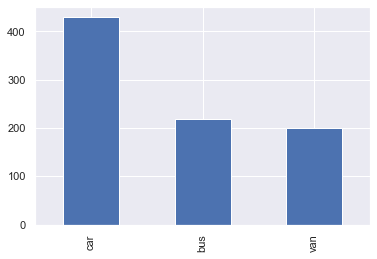

In [6]:
df['class'].value_counts().plot(kind='bar')

### 3. Check for any missing values in the data 

In [7]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [8]:
from scipy.stats import zscore

In [9]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(exclude='object')

In [10]:
df_cat.columns

Index(['class'], dtype='object')

In [11]:
new_data=df.dropna(axis=0, how ='any')

In [12]:
df.shape  # Original shape

(846, 19)

In [13]:
new_data.shape  # after doing dropna shape is

(813, 19)

In [14]:
new_data['class'].value_counts()  ## new data counts

car    413
bus    205
van    195
Name: class, dtype: int64

In [15]:
new_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [16]:
new_data['class']=new_data['class'].replace({'car':0,'bus':1,'van':2})

C:\Users\Sishir kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
new_data.head(2)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2

In [18]:
new_data['class'].unique()

array([2, 0, 1], dtype=int64)

C:\Users\Sishir kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sishir kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


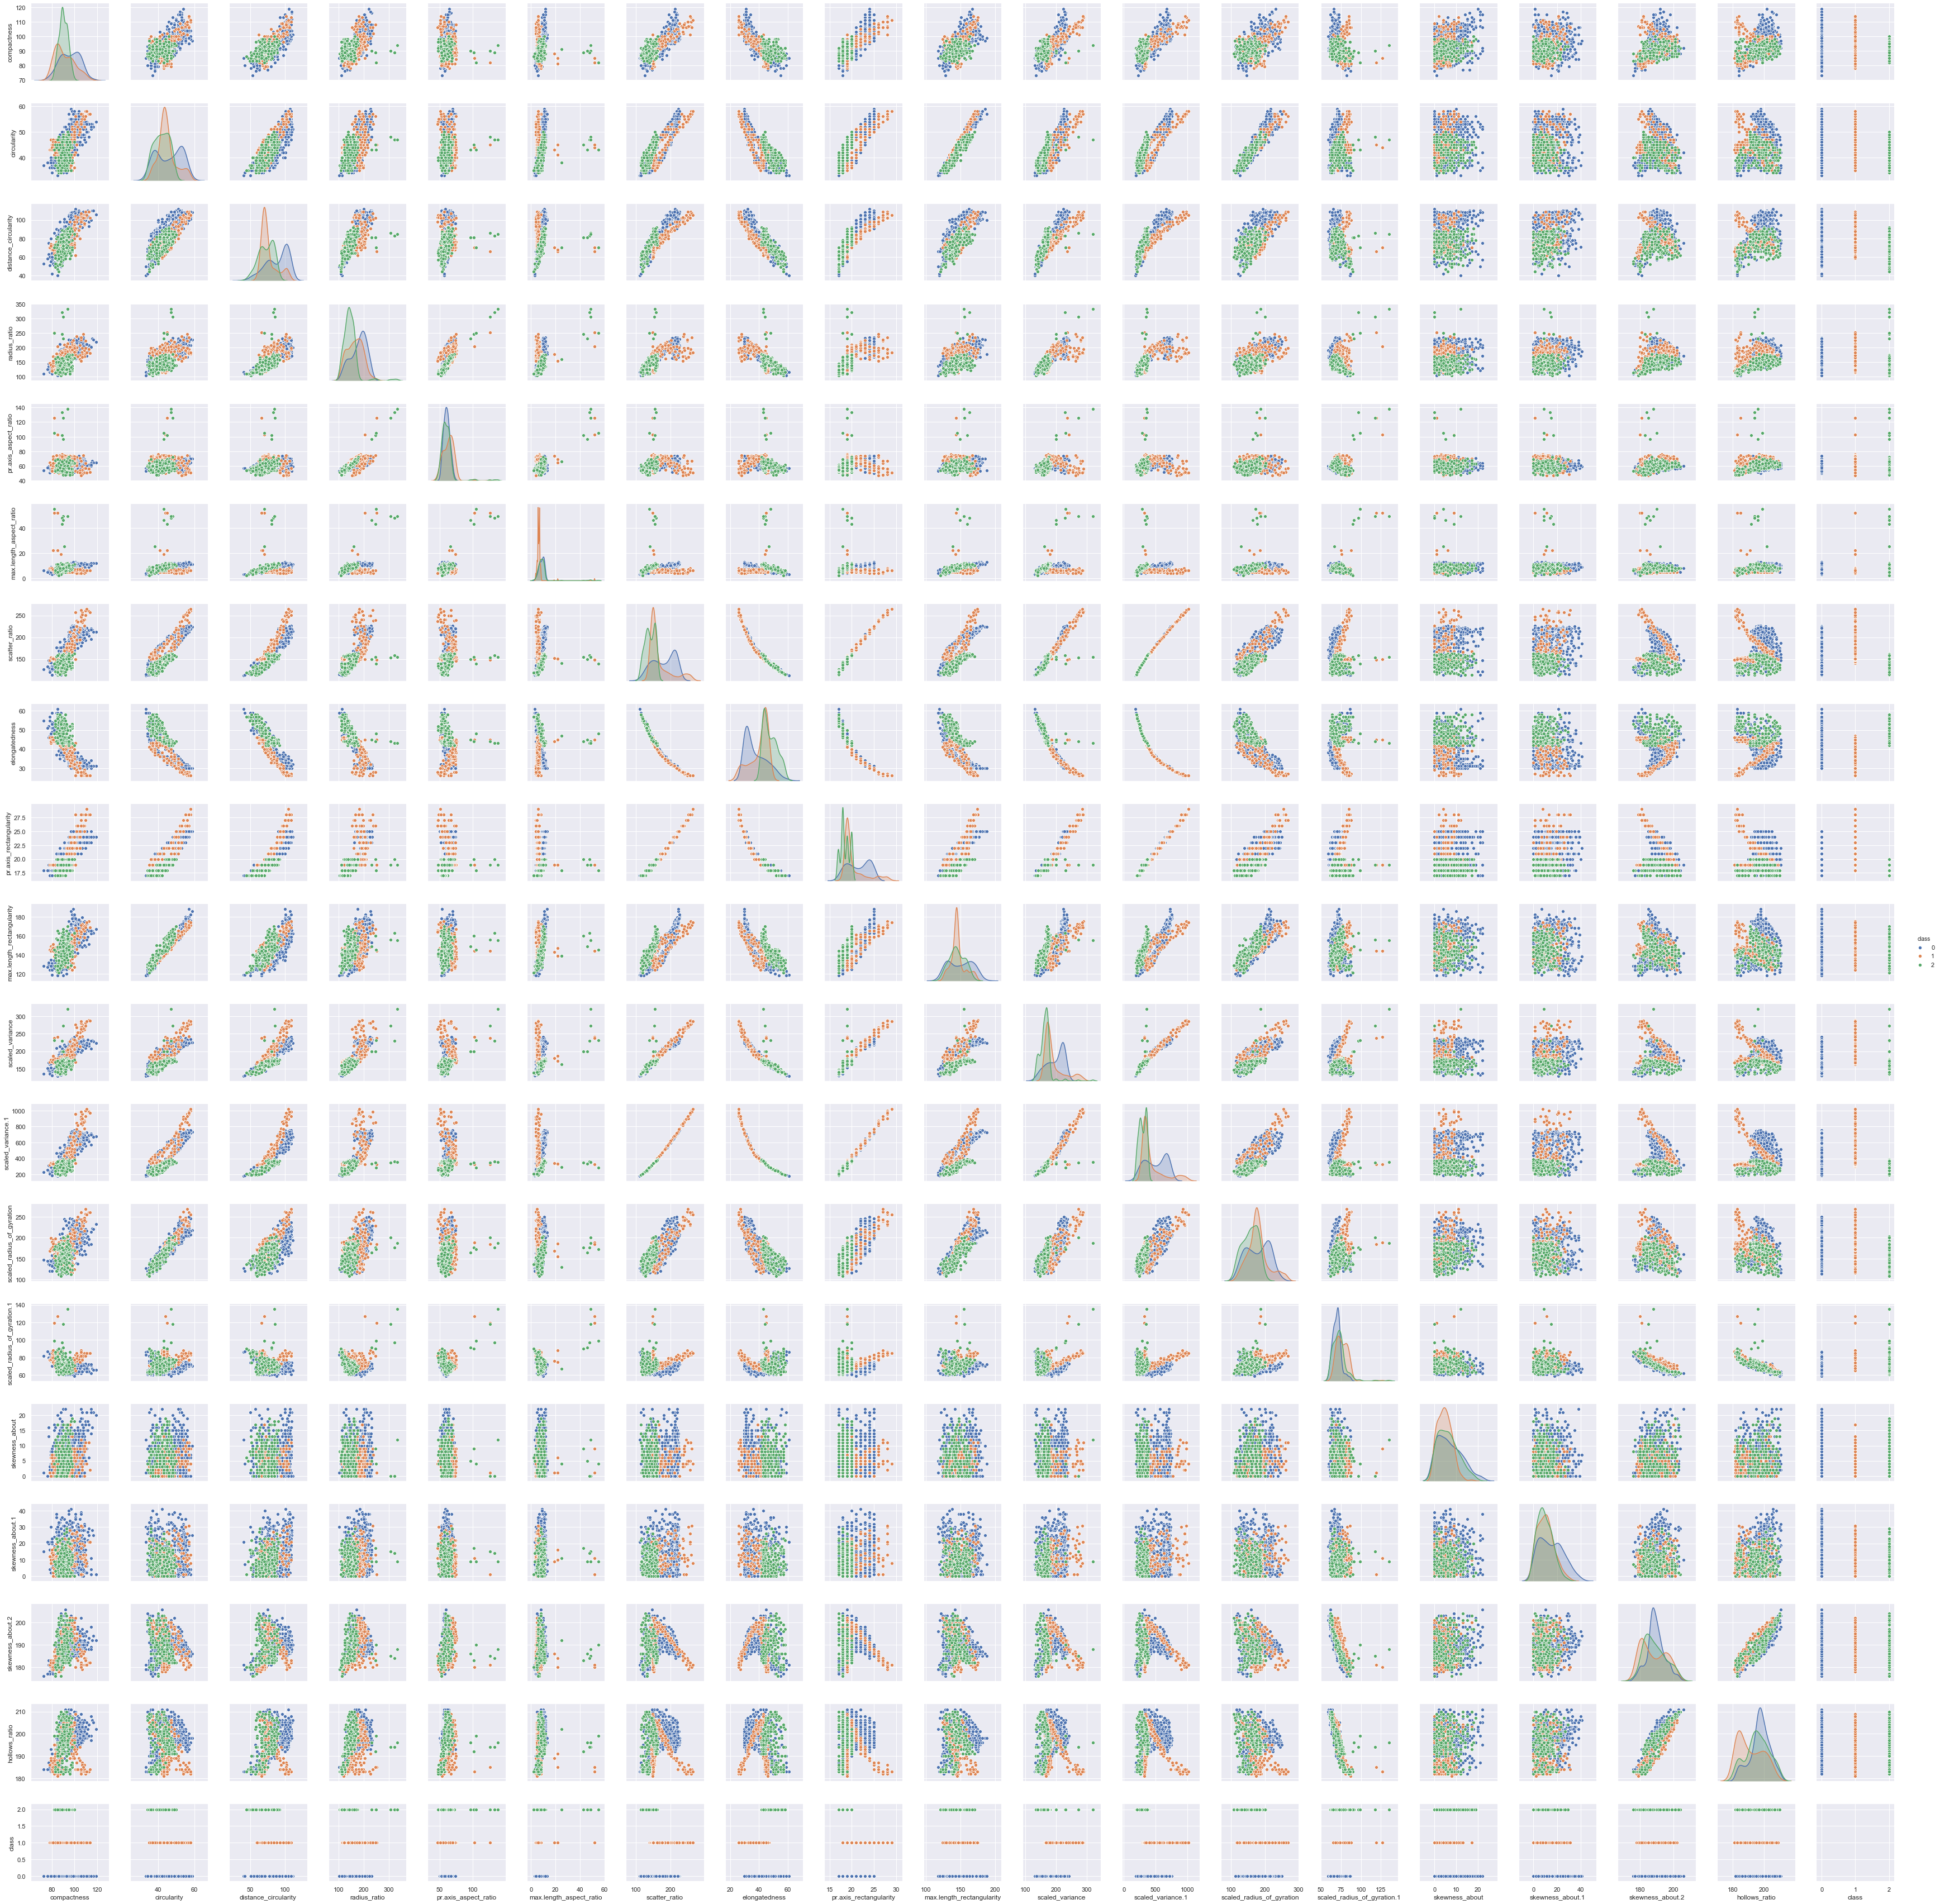

In [19]:
sns.pairplot(data=new_data,hue='class')

In [20]:
new_data_scaled= new_data.apply(zscore)

In [21]:
new_data_scaled.head(2)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   

   skewness_about.2  hollows_ratio     class  
0         -0.321809       0.171837  1.542453  
1          0.003400       0.442318  1.542453

### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [22]:
from sklearn.metrics import silhouette_score

Text(0.5, 0, 'k values')

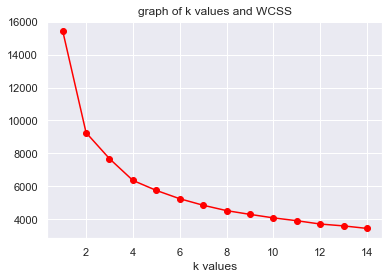

In [23]:
from sklearn.cluster import KMeans
wcss  = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(new_data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15) ,wcss ,color = 'red' , marker = 'o')
plt.title('graph of k values and WCSS')
plt.xlabel('k values')

In [25]:
wcss  = []
sil_kmeans = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k , random_state = 0)
    kmeans.fit(new_data_scaled)
    
    in_km = kmeans.inertia_
    wcss.append(kmeans.inertia_)
    sil_km = silhouette_score(new_data_scaled , kmeans.labels_)
    sil_kmeans.append(sil_km)
    
    print('Number of cluster :' , k)
    print('kmeans inertia :' , in_km)
    print('silhouette score :' ,sil_km )

Number of cluster : 2
kmeans inertia : 9260.150521596961
silhouette score : 0.3790622400009959
Number of cluster : 3
kmeans inertia : 7682.251256561902
silhouette score : 0.280322477771196
Number of cluster : 4
kmeans inertia : 6362.509519202595
silhouette score : 0.29332311705928205
Number of cluster : 5
kmeans inertia : 5791.446538554607
silhouette score : 0.2363688586429602
Number of cluster : 6
kmeans inertia : 5256.4718995921585
silhouette score : 0.20808242056227327
Number of cluster : 7
kmeans inertia : 4855.982982235856
silhouette score : 0.22094353111556453
Number of cluster : 8
kmeans inertia : 4526.971746680297
silhouette score : 0.22088874501538175
Number of cluster : 9
kmeans inertia : 4325.49173791609
silhouette score : 0.195390694373254
Number of cluster : 10
kmeans inertia : 4095.8163225499757
silhouette score : 0.20475157091434973


### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### 8. Find out the optimal value of K

In [26]:
# As we can see in the above plot the optimal value as 2 because there we can see the value is decreasing drastically.

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [27]:
kmeans= KMeans(n_clusters=2,random_state=0)
y_cluster_kmeans= kmeans.fit_predict(new_data_scaled)

In [28]:
# plt.scatter(new_data_scaled[y_cluster_kmeans==0,0],new_data_scaled[y_cluster_kmeans==0,1],s=100,c='red',label='Cluster 1')
# plt.scatter(new_data_scaled[y_cluster_kmeans==1,0],new_data_scaled[y_cluster_kmeans==1,1],s=100,c='green',label='Cluster 2')
# plt.title('Cluster')
# plt.legend()
# plt.show()

TypeError: '(array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False, False, False,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True, False, False,  True,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False]), 0)' is an invalid key

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [31]:
pd.DataFrame(kmeans.cluster_centers_,columns=new_data.columns)

compactness  circularity  distance_circularity  radius_ratio  \
0     1.064946     1.097415              1.142271      0.998118   
1    -0.562499    -0.579650             -0.603342     -0.527201   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.209131                 0.284494       1.205193   
1             -0.110462                -0.150268      -0.636578   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -1.148530                1.208218                   1.012058   
1       0.606648               -0.638175                  -0.534565   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         1.156722           1.210376                   1.008194   
1        -0.610975          -0.639315                  -0.532523   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.089228        0.146264          0.242843   
1                     0.047130       -0.077256         -0.128269   

   skewness_about.2  hollows_ratio     class  
0          0.072261       0.234404 -0.647768  
1         -0.038168      -0.123811  0.342148

### 11. Use kmeans.labels_ function to print out the labels of the classes

In [32]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

### 12. Use kmeans.labels_ function to print out the labels of the classes